<a href="https://colab.research.google.com/github/Swetha2905-ansh/Vehicle-price-prediction/blob/main/Predict_vehicle_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name - Vehicle Price Prediction**

Summary

Objective

Build a system that can predict the prices for vehicles using data on Vehicle specifications,
make, etc. Explore the data to understand the features and figure out an approach.




Problem Statement

Project Overview:

In the automotive industry, determining the price of a vehicles of different car models involves various factors, such as brand reputation, car features, horsepower, and fuel efficiency. Vehicle price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for vehcile price prediction.

Key Objectives:

Explore the factors affecting vehicle prices.
Create a machine learning model to predict vehicle prices.
Gain valuable experience in the field of machine learning and automotive pricing.

1. Know The Data

   Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("dataset.csv")

Dataset First View

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  1002
Number of columns are:  17


Dataset Information

In [5]:

# Dataset Info
# Checking information about the dataset using info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

Duplicate Values

In [6]:

# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 24


Missing Values/Null Values

In [7]:

# Missing Values/Null Values Count
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


2. Understanding The Variables

In [8]:

# Dataset Columns
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [9]:

# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1002.00,979.00,1000,897.00,995,968.00,1000,1001,999,995.00,997,964,1002
unique,358,761,28,153,NaN,NaN,100,NaN,7,NaN,38,197,8,NaN,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,NaN,NaN,16V GDI DOHC Turbo,NaN,Gasoline,NaN,8-Speed Automatic,Limited,SUV,NaN,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,NaN,NaN,130,NaN,664,NaN,325,69,704,NaN,81,510,461
mean,NaN,NaN,NaN,NaN,2023.92,50202.99,NaN,4.98,NaN,69.03,NaN,NaN,NaN,3.94,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.30,18700.39,NaN,1.39,NaN,507.44,NaN,NaN,NaN,0.27,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2023.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024.00,36600.00,NaN,4.00,NaN,4.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2024.00,47165.00,NaN,4.00,NaN,8.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2024.00,58919.50,NaN,6.00,NaN,13.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN


Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in name is 358
No. of unique values in description is 761
No. of unique values in make is 28
No. of unique values in model is 153
No. of unique values in year is 3
No. of unique values in price is 859
No. of unique values in engine is 100
No. of unique values in cylinders is 5
No. of unique values in fuel is 7
No. of unique values in mileage is 95
No. of unique values in transmission is 38
No. of unique values in trim is 197
No. of unique values in body is 8
No. of unique values in doors is 4
No. of unique values in exterior_color is 263
No. of unique values in interior_color is 91
No. of unique values in drivetrain is 4


3. Data Wrangling

   Data Wrangling Code

In [11]:
# Adding a 'Current Year' column with a constant value of 2023 to the DataFrame
df['Current year'] = 2024

# Calculating the age of the vehicles by subtracting the 'Year' column from the 'Current Year'
df['no_year'] = df['Current year'] - df['year']


In [12]:

# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current year'], axis=1, inplace=True)

In [13]:

# New updated DataFrame
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,no_year
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,0
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,0
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,0
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,1
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,0


In [14]:
# Defining dependent variable
dependent_variable = ['price']

4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart - 1 : Top 10 Most Selling vehicles

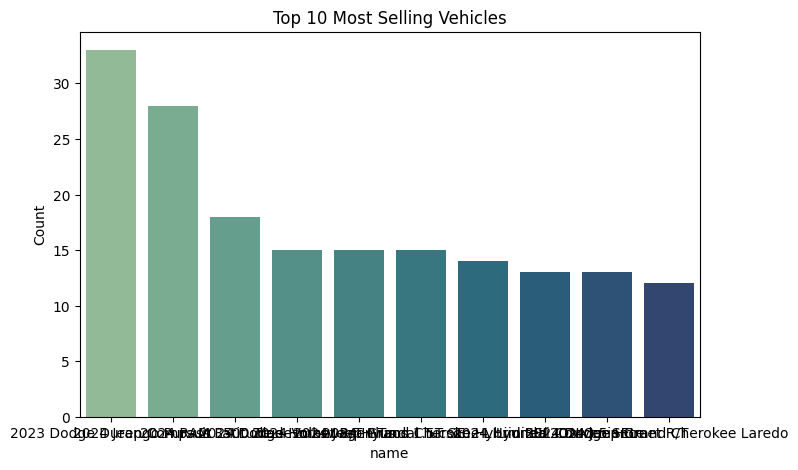

In [15]:
# Chart - 1 Count plot visualization code for top 10 most selling vehicle
# Count the occurrences of each unique vehicle name in the 'Name' column and take the top 10 most selling vehicle
top10 = df['name'].value_counts()[:10]

# Create a count plot to visualize the top 10 vehicles
plt.figure(figsize=(8, 5))
sns.countplot(x='name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Vehicles')

# Display the plot
plt.show()

Chart - 2 : Number of vehicles Bought Each Year

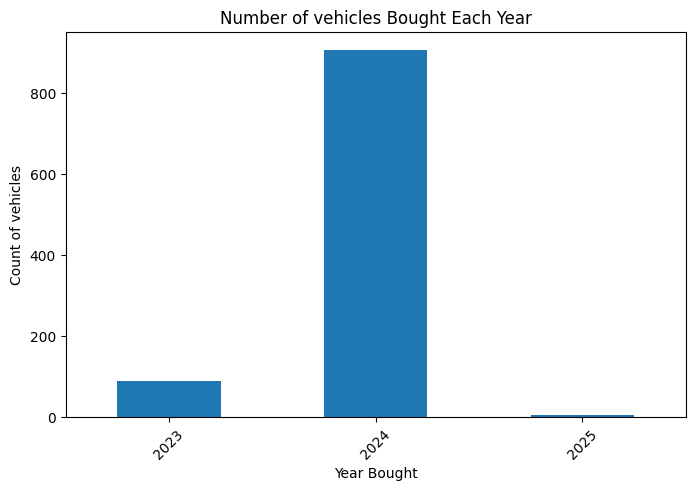

In [16]:
# Chart - 2 Bar plot visualization code for Number of vehciles Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('year').count()['name']

# Create a bar plot to visualize the count of vehicles bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of vehicles')
plt.title('Number of vehicles Bought Each Year')

# Display the plot
plt.show()

Chart - 3 : Distribution of Categorical Variable

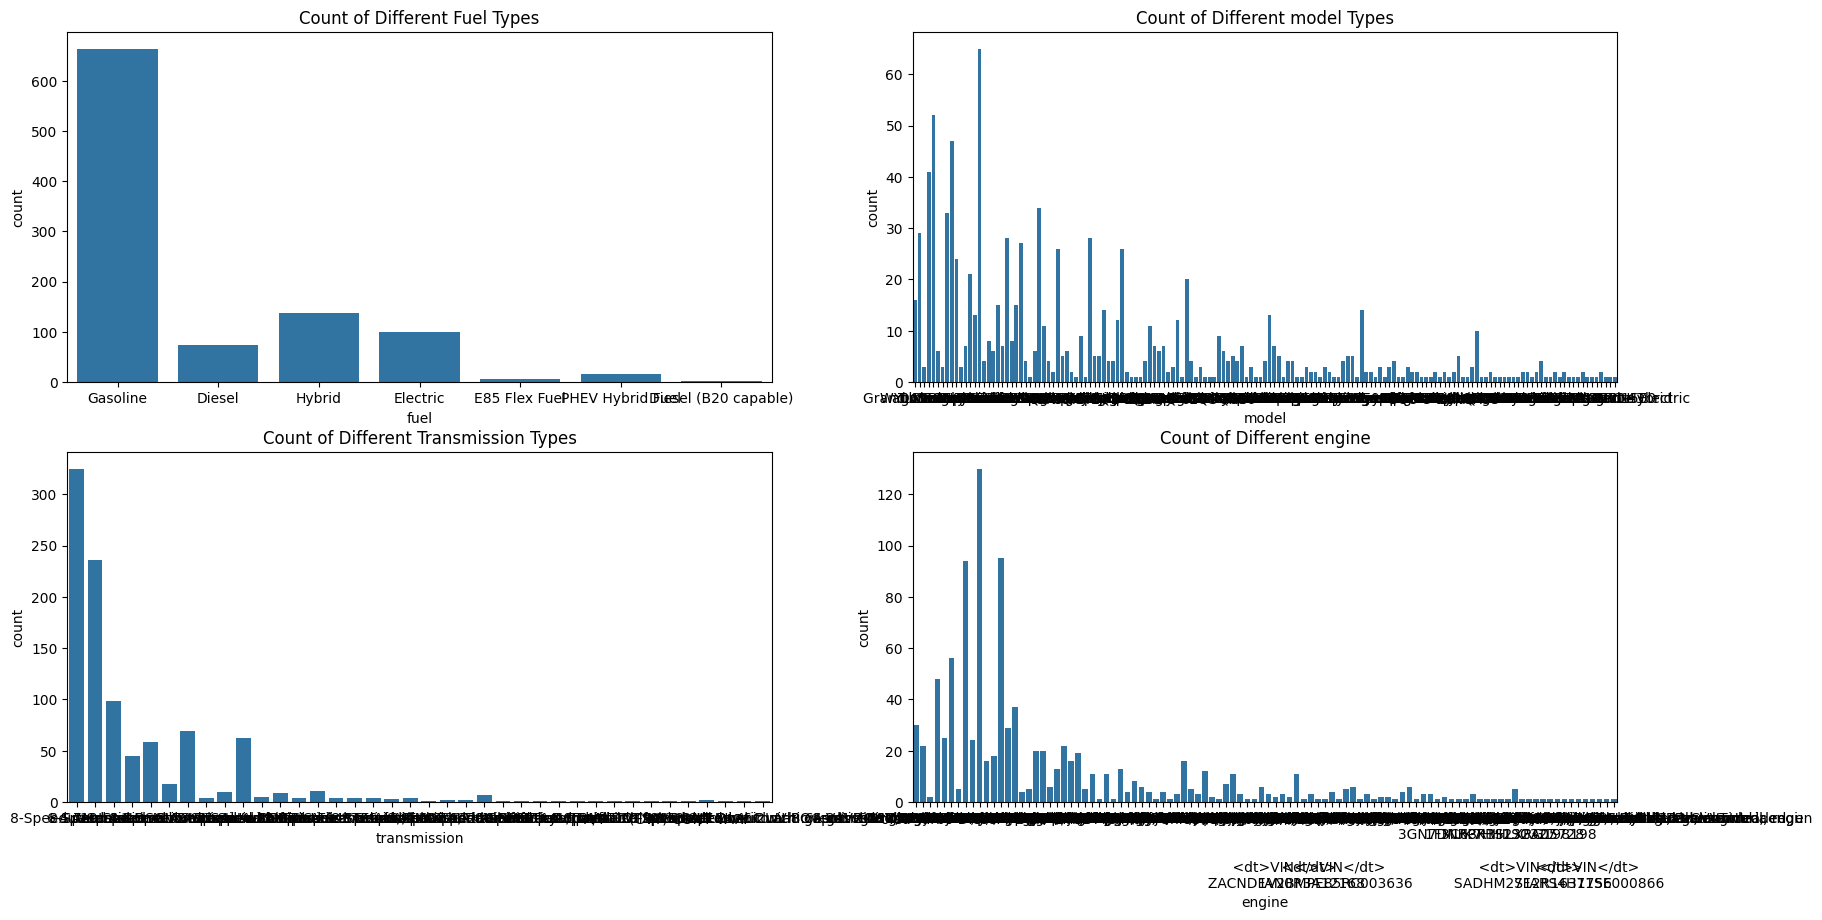

In [19]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'fuel')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different model Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'model')
plt.title("Count of Different model Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different engine
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'engine')
plt.title("Count of Different engine")

# Display the plot
plt.show()


Chart - 4 : Categorical Variable vs Target Variable

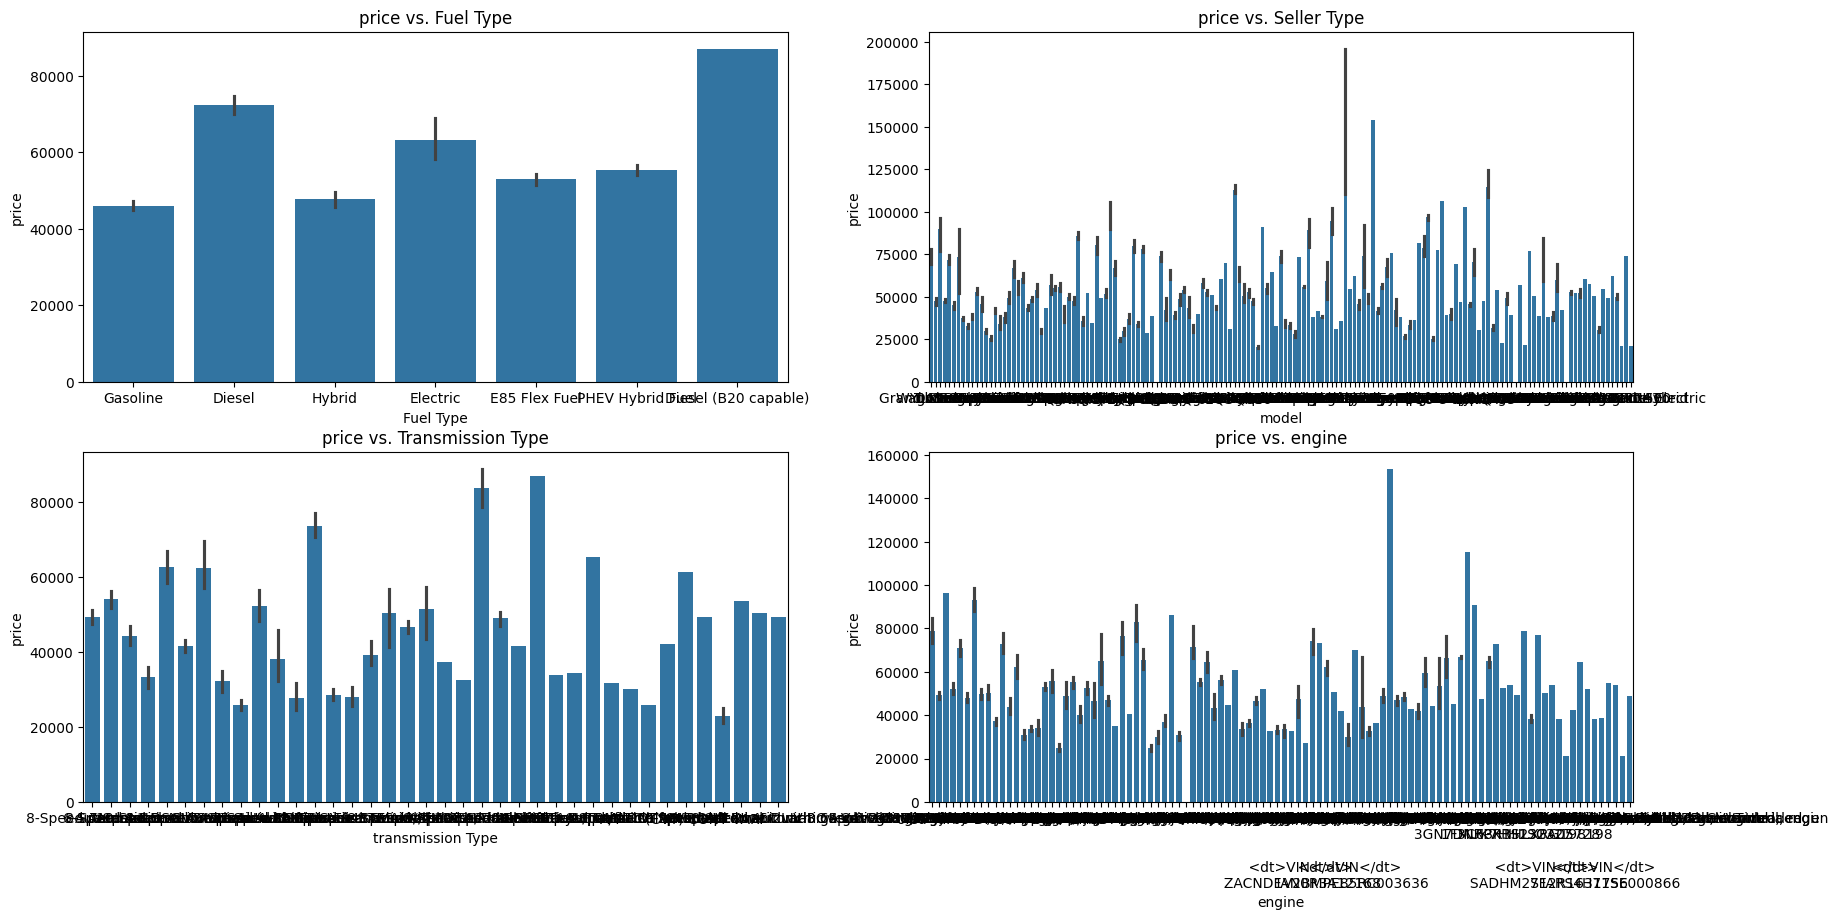

In [20]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='fuel', y='price')
plt.xlabel('Fuel Type')
plt.ylabel('price')
plt.title('price vs. Fuel Type')

# Subplot 2: Barplot for price vs. model
plt.subplot(2,2,2)
sns.barplot(data=df, x='model', y='price')
plt.xlabel('model')
plt.ylabel('price')
plt.title('price vs. Seller Type')

# Subplot 3: Barplot for price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='transmission', y='price')
plt.xlabel('transmission Type')
plt.ylabel('price')
plt.title('price vs. Transmission Type')

# Subplot 4: Barplot for price vs. engine
plt.subplot(2,2,4)
sns.barplot(data=df, x='engine', y='price')
plt.xlabel('engine')
plt.ylabel('price')
plt.title('price vs. engine')

# Display the plot
plt.show()


Chart - 5 : Mileage vs Selling Price

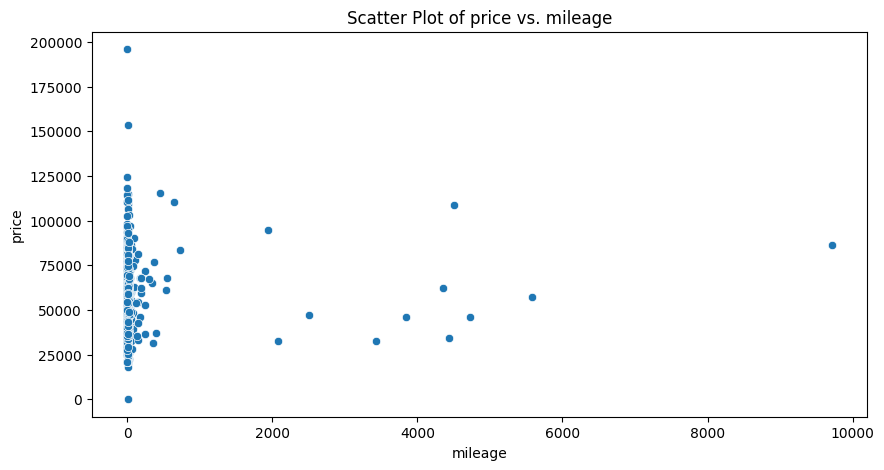

In [21]:
# Chart - 5 Scatter plot visualization code for Mileage vs Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between mileage and Price
sns.scatterplot(data=df, x='mileage', y='price')

# Set labels for the x and y axes
plt.xlabel('mileage')
plt.ylabel('price')

# Add a title to the plot
plt.title('Scatter Plot of price vs. mileage')

# Display the plot
plt.show()

Chart - 6 - Correlation Heatmap

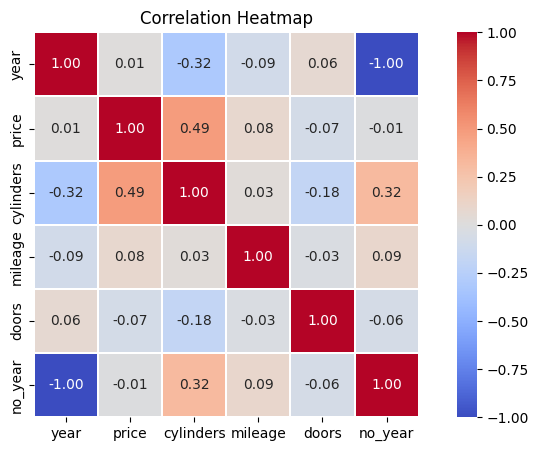

In [22]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Selecting only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(numerical_df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

5. Feature Engineering & Data Pre-processing

   Handling Outliers

In [23]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['price'] = np.where(df['price'] > upper_limit, median,np.where(df['price'] < lower_limit,median,df['price']))

# Removing outliers by Capping:
for col in ['price','mileage','year']: # Removing 'engine' from the list
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
# If 'engine' contains numerical data and needs outlier treatment,
# ensure it's converted to a suitable numeric type before applying quantile.
# For example, if 'engine' represents engine capacity in cc:
# df['engine'] = pd.to_numeric(df['engine'], errors='coerce') # Convert to numeric, handle errors
# upper_limit = df['engine'].quantile(0.99)
# df['engine'] = np.where(df['engine'] > upper_limit, upper_limit, df['engine'])

What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

Categorical Encoding

In [24]:

# Before Categorical Encoding, Remove the 'name' as it's no longer needed
df.drop(['name'], axis=1, inplace=True)

In [25]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

What all categorical encoding techniques have i used & why did i use those techniques?

One hot encoding is used to encode the categorical variables into numerical format.

3. Feature Manipulation & Selection

   Feature Manipulation

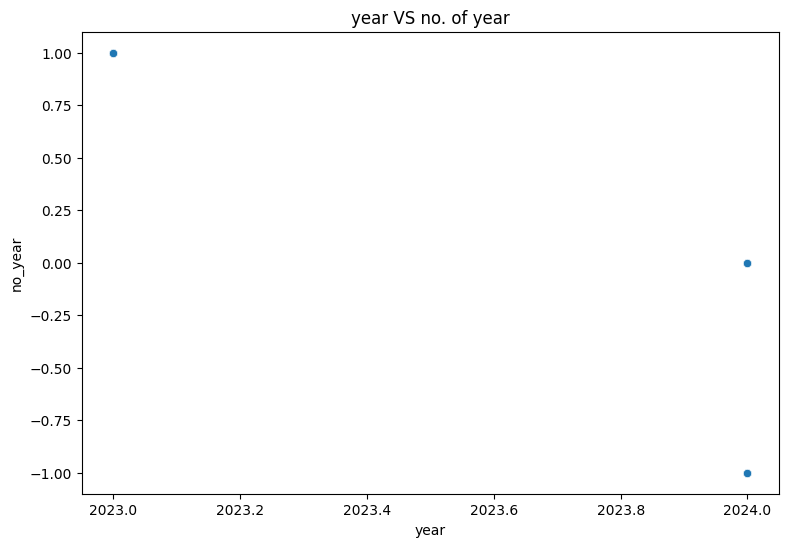

In [26]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the Year and no_year are negatively highly correlated

# Plotting Scatter plot to visualize the relationship between
# Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='year',y='no_year',data=df)
plt.xlabel('year')
plt.ylabel('no_year')
plt.title('year VS no. of year')
plt.show()

In [27]:

# Correlation
df[['year','no_year']].corr()

,year,no_year
year,1.000000,-0.965917
no_year,-0.965917,1.000000


In [28]:

# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['year'], axis=1, inplace=True)

  Feature Selection

In [29]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['price']]
features

['cylinders',
 'mileage',
 'doors',
 'no_year',
 'description_\n      \n         Alloy Wheels / Premium Wheels,  Apple CarPlay / Android Auto,  Backup Camera / Parking Sensors,  Bluetooth, Hands-Free,  Brake Assist,  Cruise Control,  Keyless Entry,  Keyless Start,  LED Headlights,  Premium Sound System / Premium Audio,  Satellite Radio Capable,  Security System,  Stability Control,  Steering Wheel Controls,  USB Port, All-Season Floor Mats, Cargo Tray, MOPAR Interior Protection Package, Navigation System, Quick Order Package 25E.\n      \n    Please see our website for a full list of rebates and incentives. All offers are WAC. See dealer for details.',
 'description_\n      \n         Alloy Wheels / Premium Wheels,  Apple CarPlay / Android Auto,  Backup Camera / Parking Sensors,  Bluetooth, Hands-Free,  Brake Assist,  Cruise Control,  Keyless Entry,  Keyless Start,  Premium Sound System / Premium Audio,  Satellite Radio Capable,  Security System,  Stability Control,  Steering Wheel Con

In [30]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
continuous_variables = ['price', 'mileage', 'no_year']

In [32]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [33]:

continuous_feature_df

,price,mileage,no_year
0,74600.0,10.0,0
1,50170.0,1.0,0
2,47165.0,0.0,0
3,46835.0,32.0,1
4,81663.0,10.0,0
...,...,...,...
997,59037.0,10.0,0
998,49720.0,0.0,0
999,69085.0,20.0,0
1000,43495.0,6.0,0


In [34]:

# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    # Replace infinite or NaN values with a finite number
    # before calculating VIF
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

continuous_variables = ['price', 'mileage', 'no_year']
continuous_feature_df = df[continuous_variables]  # Select the relevant columns directly

# Calculate VIF for the continuous features
vif_results = calc_vif(continuous_feature_df)
print(vif_results)

  variables       VIF
0     price  1.095259
1   mileage  1.035859
2   no_year  1.074325


In [35]:

# This is the final data for modeling
df.head()


,price,cylinders,mileage,doors,no_year,"description_\n \n Alloy Wheels / Premium Wheels, Apple CarPlay / Android Auto, Backup Camera / Parking Sensors, Bluetooth, Hands-Free, Brake Assist, Cruise Control, Keyless Entry, Keyless Start, LED Headlights, Premium Sound System / Premium Audio, Satellite Radio Capable, Security System, Stability Control, Steering Wheel Controls, USB Port, All-Season Floor Mats, Cargo Tray, MOPAR Interior Protection Package, Navigation System, Quick Order Package 25E.\n \n Please see our website for a full list of rebates and incentives. All offers are WAC. See dealer for details.","description_\n \n Alloy Wheels / Premium Wheels, Apple CarPlay / Android Auto, Backup Camera / Parking Sensors, Bluetooth, Hands-Free, Brake Assist, Cruise Control, Keyless Entry, Keyless Start, Premium Sound System / Premium Audio, Satellite Radio Capable, Security System, Stability Control, Steering Wheel Controls, USB Port, All-Season Floor Mats, Cargo Tray, MOPAR Interior Protection Package, Navigation System, Quick Order Package 25E.\n \n Please see our website for a full list of rebates and incentives. All offers are WAC. See dealer for details.","description_\n \n SAVE an extra $500 in the form of a Factory Rebate if you are active military, active military reserve or retired military, retired military reserve with honorable discharge or 100% disabled veteran discharged within the last 12 months. Additional Savings may be available to certain groups or individuals. Please contact us to see if you qualify. Net Cost includes a Factory Rebate, if applicable, on this vehicle and is valid on a cash or financed purchase only by an individual for their personal use. The sale price or net cost does not apply to a lease. All Pricing and Advertised Prices for any/all vehicles offered for sale does not include dealer installed accessories which can be purchased for an additional cost. The Factory Rebates may not be available on this vehicle if you elect to take advantage of a Special Alternative APR or Special Lease program. Some Factory Rebates are California Resident specific and may vary for residents of other states. We Only Provide 4 Gallons of Gas at Purchase. No sales to Dealers, Brokers or Exporters. For out of state purchase, customers must be present to purchase. If shipping is required, dealership must facilitate no exceptions. Please contact us for special Multi-Vehicle or Fleet pricing. Prices are plus government fees and taxes, any finance charges, $85 documentary fee, $33 electronic registration fee, any emission testing charge and $1.75 per new tire state tire fee. All vehicles are subject to prior sale. While every reasonable effort is made to ensure the accuracy of this information, we are not responsible for any errors or omissions contained on these pages. Leasing financing available on approved credit. Trade-ins accepted. The estimated selling price that appears after calculating dealer offers is for informational purposes, only. You may not qualify for the offers, incentives, discounts, or financing. Offers, incentives, discounts, or financing are subject to expiration and other restrictions. See dealer\n \n #1 Chrysler Dodge Jeep Ram Dealership in California! Come find out why, with over 1500 New Vehicles & 300 Pre-Owned Vehicles in Stock and with deep discounts on most models we are your number one choice ""Home Deliveries Available, Shop Online or Over the Phone""","description_\n \n !!! CALL US AT (812) 477-6201 !!!2024 Honda CR-V Hybrid Sport AWDFAMILY OWNED AND COMMUNITY DRIVEN! Shop our entire new and used inventory of Honda vehicles for sale at www.dpathonda.comPrices listed do not include a $225 documentation fee, applicable tax, title, tags, license, or $175 service and preparation. All pricing, vehicle information, and features (such as accessories and color) are believed to be accurate, but we do not warrant or guarantee such accuracy. The prices shown above may vary from region to region, and

What all feature selection methods have i used and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also I check the multicollinearity using VIF.

4. Data Transformation

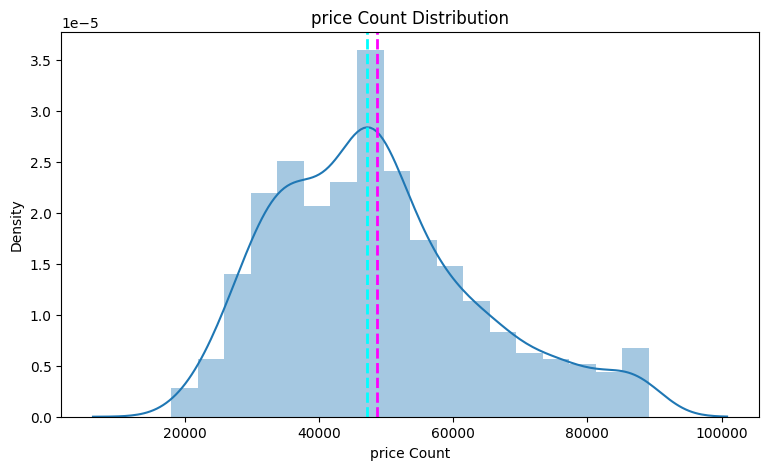

In [36]:

# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('price Count')
plt.title('price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [37]:

# Skew of the dependent variable
df[dependent_variable].skew()

,0
price,0.655998


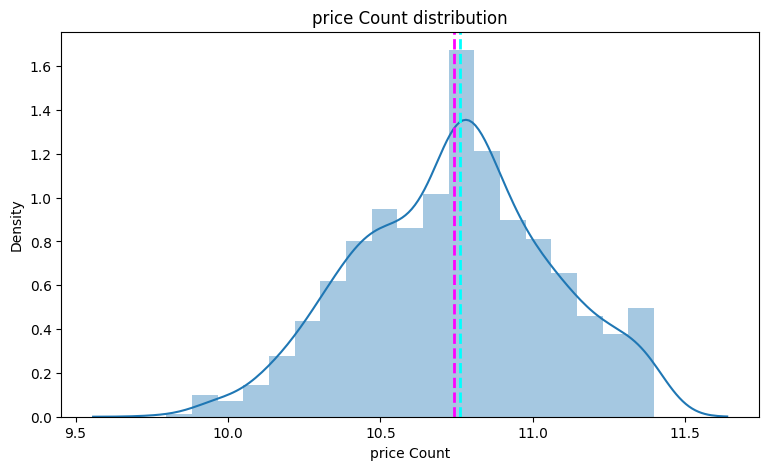

In [38]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('price Count')
plt.title('price Count distribution')
plt.axvline(np.log1p(df['price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [39]:
# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

,0
price,-0.074266


In [40]:

# Defining dependent and independent variables
X = df.drop('price',axis=1)
y = np.log1p(df[dependent_variable])

In [41]:
features

['cylinders',
 'mileage',
 'doors',
 'no_year',
 'description_\n      \n         Alloy Wheels / Premium Wheels,  Apple CarPlay / Android Auto,  Backup Camera / Parking Sensors,  Bluetooth, Hands-Free,  Brake Assist,  Cruise Control,  Keyless Entry,  Keyless Start,  LED Headlights,  Premium Sound System / Premium Audio,  Satellite Radio Capable,  Security System,  Stability Control,  Steering Wheel Controls,  USB Port, All-Season Floor Mats, Cargo Tray, MOPAR Interior Protection Package, Navigation System, Quick Order Package 25E.\n      \n    Please see our website for a full list of rebates and incentives. All offers are WAC. See dealer for details.',
 'description_\n      \n         Alloy Wheels / Premium Wheels,  Apple CarPlay / Android Auto,  Backup Camera / Parking Sensors,  Bluetooth, Hands-Free,  Brake Assist,  Cruise Control,  Keyless Entry,  Keyless Start,  Premium Sound System / Premium Audio,  Satellite Radio Capable,  Security System,  Stability Control,  Steering Wheel Con

  Data Scaling

In [42]:

features = [i for i in df.columns if i not in ['price']]

In [43]:

# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

 Data Splitting

In [44]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:

# Checking the train distribution of dependent variable
y_train.value_counts()

,count
price,
10.761429,21
10.754407,8
11.397865,6
10.270246,4
10.765132,4
...,...
10.612287,1
10.608440,1
10.607451,1


 ML Model Implementation

In [46]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [47]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

Linear Regression

In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Before scaling, impute NaN values in 'features' columns and target variable 'price' of df
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
# Apply imputation to all features AND the target variable (price)
all_cols_to_impute = features + ['price']
df[all_cols_to_impute] = imputer.fit_transform(df[all_cols_to_impute])

# Now proceed with scaling, log transformation and model fitting as before
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Apply log transformation to the target variable AFTER imputation
y = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 82436438.92105207
RMSE : 9079.451465867973
MAE : 5503.609953153382
Train R2 : 0.9997319226133765
Test R2 : 0.6284616256169575
Adjusted R2 :  1.082320171576745


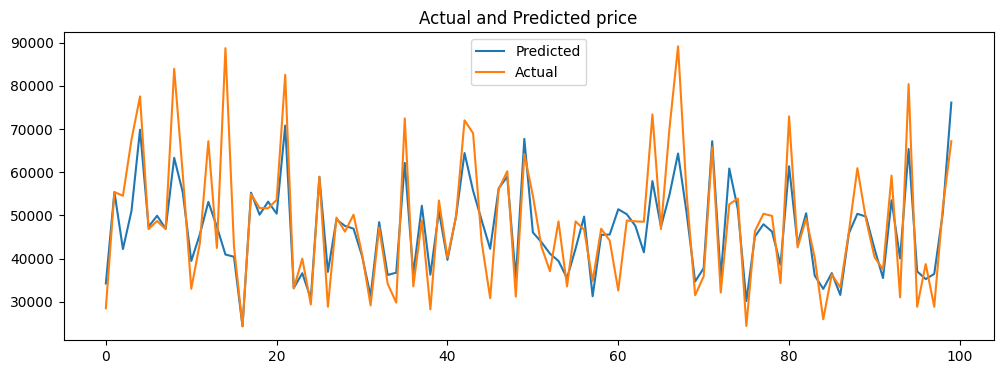

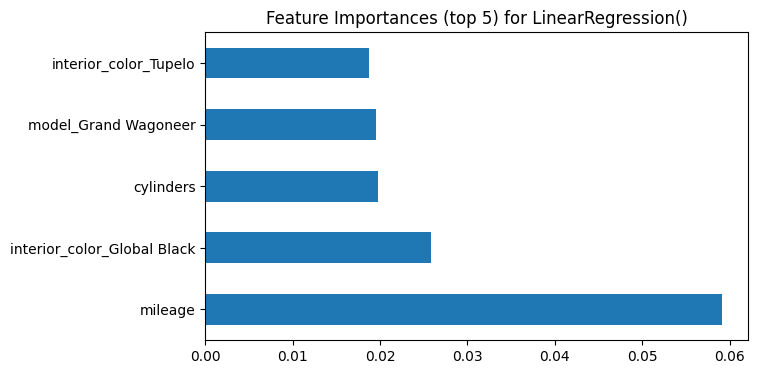

In [49]:

# Visualizing evaluation Metric Score chart
y_pred_li = reg.predict(X_test)  # Get predictions from the model
linear_score = evaluate_model(reg, y_test, y_pred_li)
score['Linear regression'] = linear_score

In [50]:

# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,8.243644e+07
RMSE,9.079451e+03
MAE,5.503610e+03
Train R2,9.997319e-01
Test R2,6.284616e-01
Adjusted R2,1.082320e+00


Cross- Validation & Hyperparameter Tuning

In [51]:

# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [52]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)


Best parameters:  {'fit_intercept': True}
Best R2 score:  0.7057920045974294


In [53]:

# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [56]:

# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 82436438.92105207
RMSE : 9079.451465867973
MAE : 5503.609953153382
Train R2 : 0.9997319226133765
Test R2 : 0.6284616256169575
Adjusted R2 :  1.082320171576745


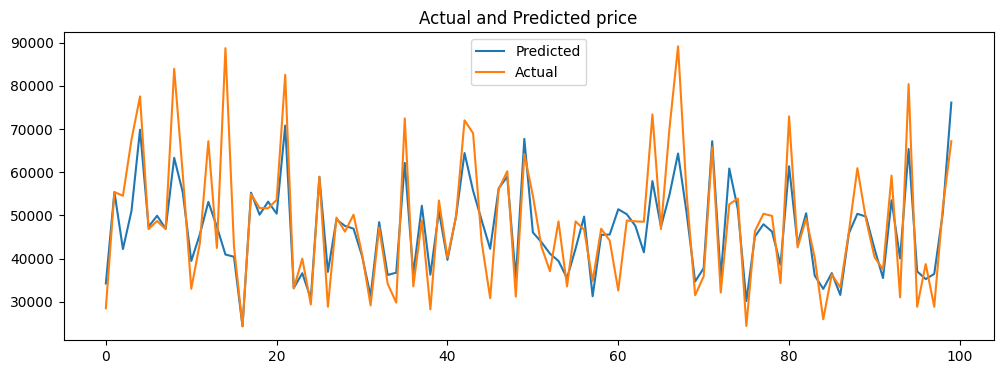

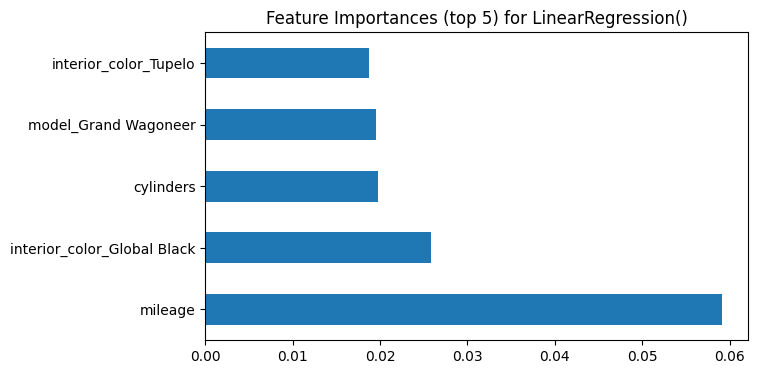

In [57]:

# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [58]:

# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,8.243644e+07,8.243644e+07
RMSE,9.079451e+03,9.079451e+03
MAE,5.503610e+03,5.503610e+03
Train R2,9.997319e-01,9.997319e-01
Test R2,6.284616e-01,6.284616e-01
Adjusted R2,1.082320e+00,1.082320e+00


Decision Tree

In [59]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 71728792.9950616
RMSE : 8469.285270615319
MAE : 4612.088197048598
Train R2 : 0.9998655411674375
Test R2 : 0.6767206408398452
Adjusted R2 :  1.0716276275834908


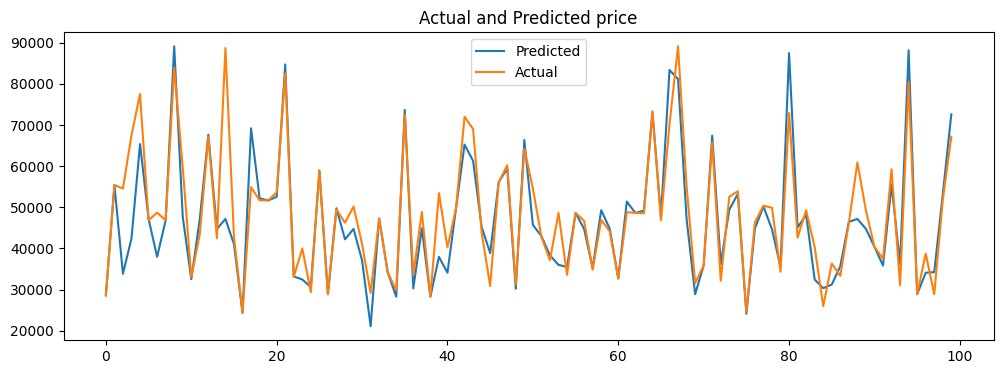

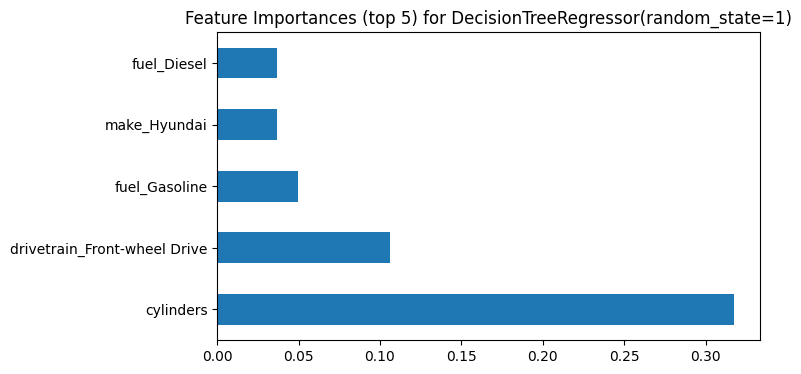

In [60]:

# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [61]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree
MSE,8.243644e+07,8.243644e+07,7.172879e+07
RMSE,9.079451e+03,9.079451e+03,8.469285e+03
MAE,5.503610e+03,5.503610e+03,4.612088e+03
Train R2,9.997319e-01,9.997319e-01,9.998655e-01
Test R2,6.284616e-01,6.284616e-01,6.767206e-01
Adjusted R2,1.082320e+00,1.082320e+00,1.071628e+00


Cross- Validation & Hyperparameter Tuning

In [62]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:

dt_best_params

{'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [63]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [64]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [65]:

# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 96112444.24696296
RMSE : 9803.695438300956
MAE : 7210.586978228846
Train R2 : 0.6253847521611233
Test R2 : 0.566824310209521
Adjusted R2 :  1.0959768884321592


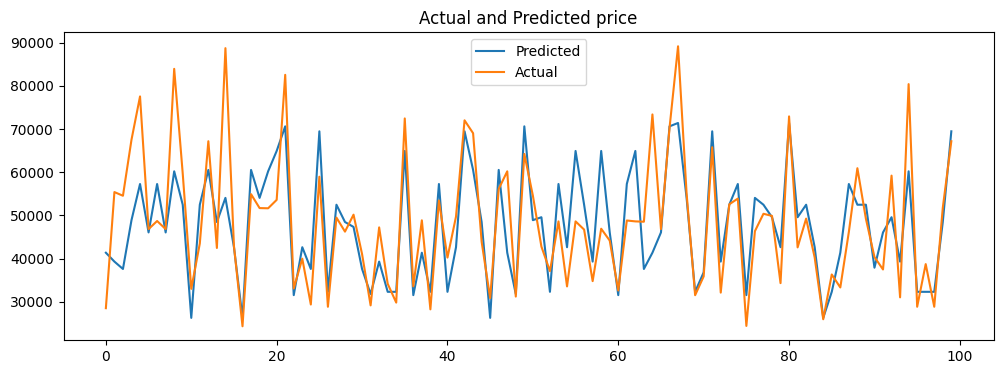

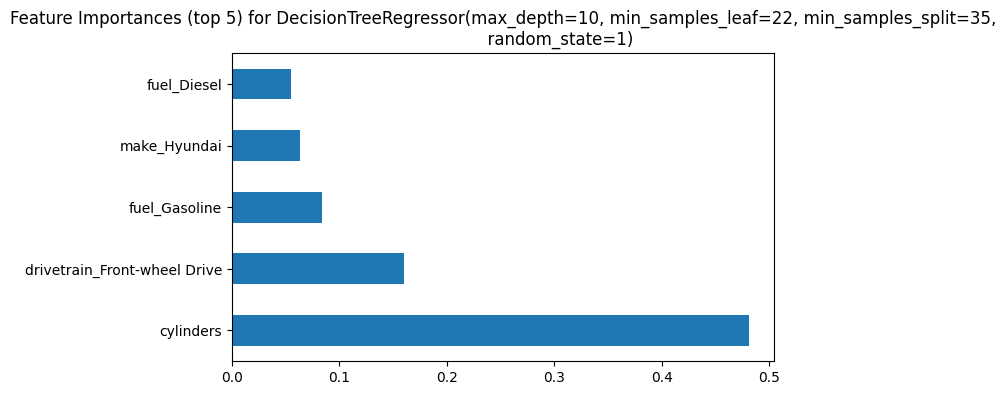

In [66]:

# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

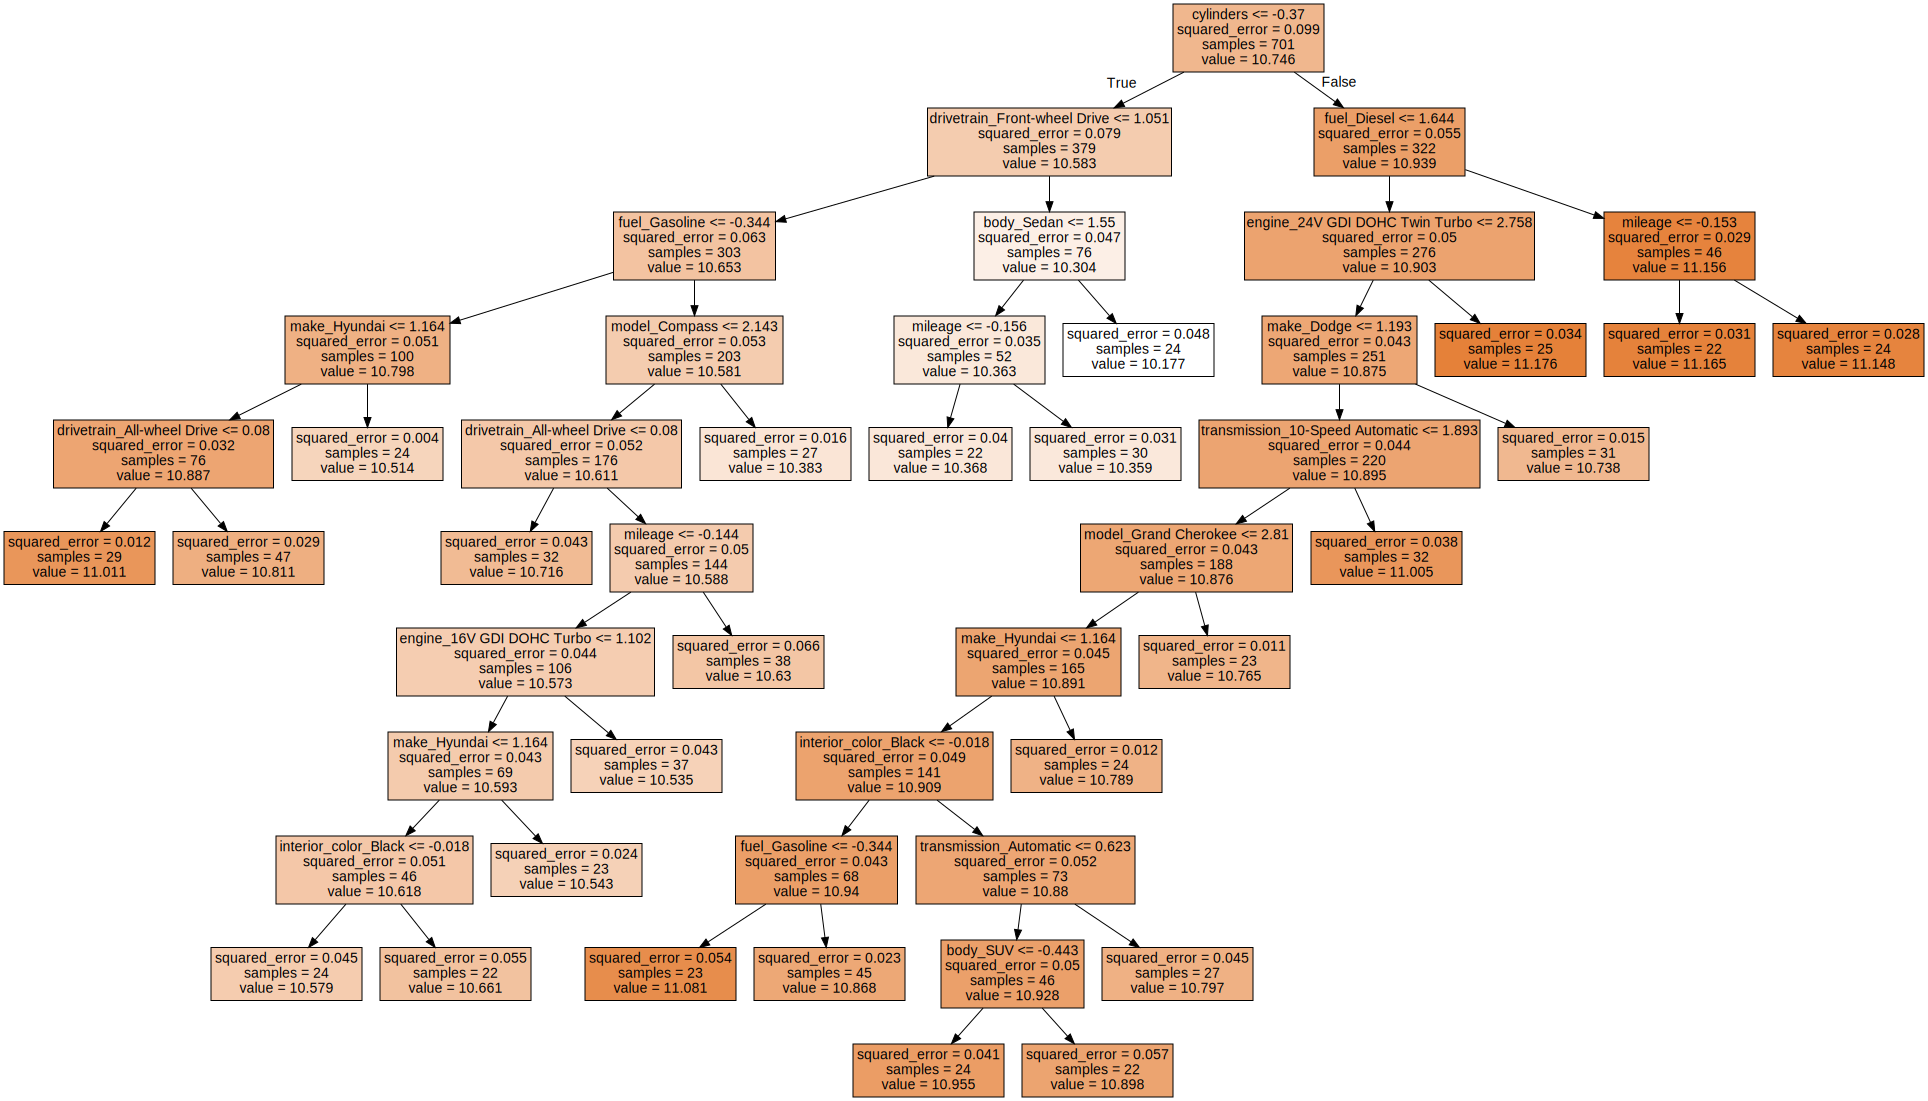

In [67]:

# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

In [ ]:

# Updated Evaluation Metric Score Chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned
MSE,6.543630e+07,6.543630e+07,5.518620e+07,9.134646e+07
RMSE,8.089271e+03,8.089271e+03,7.428741e+03,9.557534e+03
MAE,5.181446e+03,5.181446e+03,4.231421e+03,7.088512e+03
Train R2,9.997018e-01,9.997018e-01,9.998504e-01,6.240969e-01
Test R2,6.610489e-01,6.610489e-01,7.141430e-01,5.268378e-01
Adjusted R2,1.075100e+00,1.075100e+00,1.063336e+00,1.104837e+00


Random Forest

In [68]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 48477332.24118964
RMSE : 6962.566498152074
MAE : 4100.900908954916
Train R2 : 0.9622298092307171
Test R2 : 0.7815142253710492
Adjusted R2 :  1.048408960405233


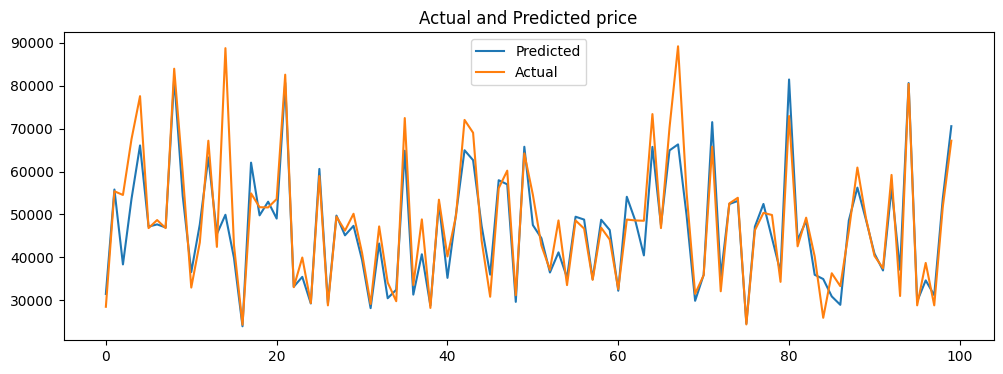

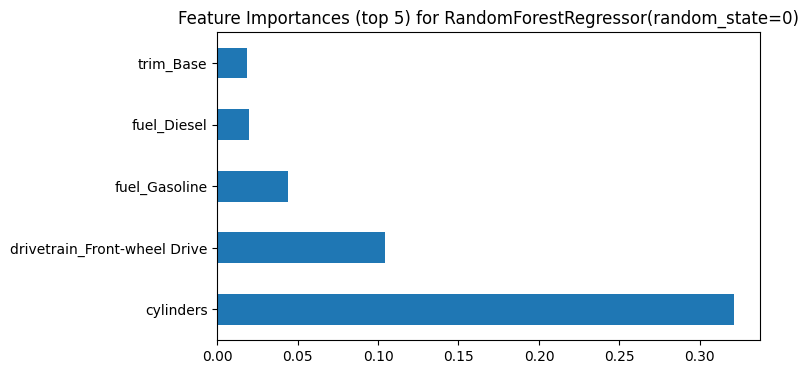

In [69]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [70]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest
MSE,8.243644e+07,8.243644e+07,7.172879e+07,9.611244e+07,4.847733e+07
RMSE,9.079451e+03,9.079451e+03,8.469285e+03,9.803695e+03,6.962566e+03
MAE,5.503610e+03,5.503610e+03,4.612088e+03,7.210587e+03,4.100901e+03
Train R2,9.997319e-01,9.997319e-01,9.998655e-01,6.253848e-01,9.622298e-01
Test R2,6.284616e-01,6.284616e-01,6.767206e-01,5.668243e-01,7.815142e-01
Adjusted R2,1.082320e+00,1.082320e+00,1.071628e+00,1.095977e+00,1.048409e+00


Cross- Validation & Hyperparameter Tuning

In [71]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [72]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [73]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [ ]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [ ]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 88378063.30947538
RMSE : 9400.960765234337
MAE : 7030.899672703355
Train R2 : 0.5670806887306288
Test R2 : 0.5422136789060519
Adjusted R2 :  1.1014297609513917


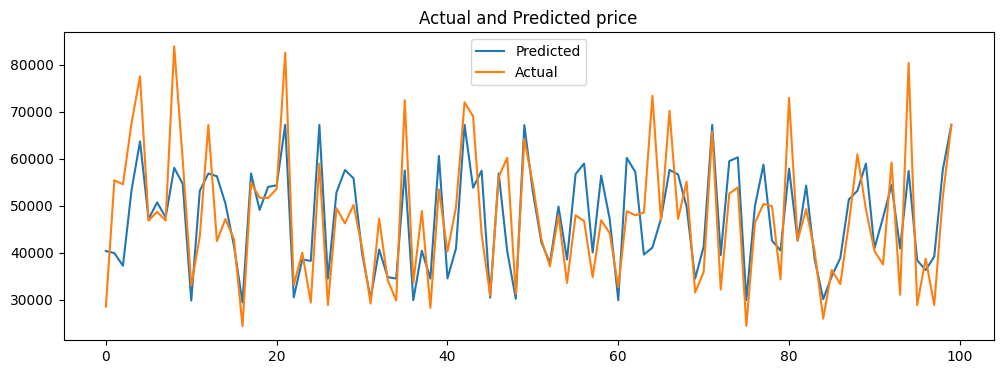

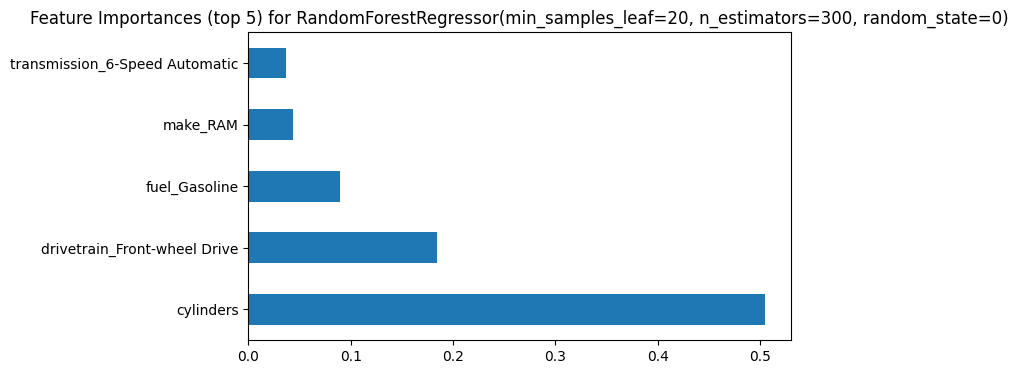

In [ ]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,6.543630e+07,6.543630e+07,5.518620e+07,9.134646e+07,5.032984e+07,8.837806e+07
RMSE,8.089271e+03,8.089271e+03,7.428741e+03,9.557534e+03,7.094353e+03,9.400961e+03
MAE,5.181446e+03,5.181446e+03,4.231421e+03,7.088512e+03,4.235816e+03,7.030900e+03
Train R2,9.997018e-01,9.997018e-01,9.998504e-01,6.240969e-01,9.593369e-01,5.670807e-01
Test R2,6.610489e-01,6.610489e-01,7.141430e-01,5.268378e-01,7.392983e-01,5.422137e-01
Adjusted R2,1.075100e+00,1.075100e+00,1.063336e+00,1.104837e+00,1.057763e+00,1.101430e+00
